In [1]:
# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Loading the CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizing the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print("shape::", X_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
shape:: (50000, 32, 32, 3)


In [3]:
# Creating the Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [4]:
# Compile model
epochs = 25
lr = 0.01
decay = lr / epochs
sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [5]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 44s 7ms/step - loss: 2.0501 - accuracy: 0.2344 - val_loss: 1.5787 - val_accuracy: 0.4448
Epoch 2/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4671 - accuracy: 0.4668 - val_loss: 1.2617 - val_accuracy: 0.5459
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2514 - accuracy: 0.5470 - val_loss: 1.1463 - val_accuracy: 0.5869
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1070 - accuracy: 0.6053 - val_loss: 1.0047 - val_accuracy: 0.6440
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9831 - accuracy: 0.6537 - val_loss: 0.9365 - val_accuracy: 0.6718
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8858 - accuracy: 0.6869 - val_loss: 0.8472 - val_accuracy: 0.7032
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8073 - accuracy: 0.7125 - val_loss: 0.8084 - val_ac

In [6]:
# Saving the Model
model.save('cifar10_model2.h5')

In [9]:
# Loading the saved Model
savedModel = load_model('cifar10_model2.h5')

In [10]:
# Final evaluation of the model
scores = savedModel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
# The Training is 5% less than Usecase model and test accuracy is 9% more than previous model.
# The Usecase model is overfitting as there are few layers to represent the given dataset.

Accuracy: 79.34%


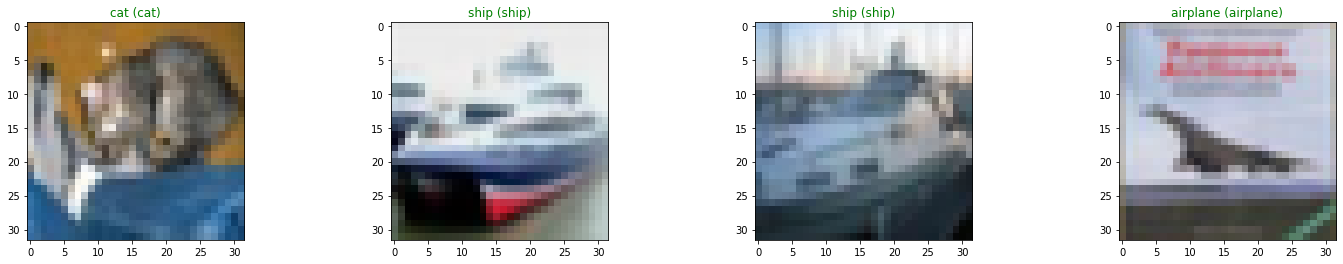

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in range(4):
    ax = fig.add_subplot(1, 4, idx+1)
    ax.imshow(X_test[idx])
    y_pred = np.argmax(savedModel.predict(np.expand_dims(X_test[idx], axis=0)), axis=-1)
    y_actual = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classes[y_pred.item()], classes[y_actual]),
                 color=("green" if y_pred.item()==y_actual else "red"))
    
# The model is Correctly classifying the four test images. 
# The UseCase model incorrectly predicted the third image as Airplane when the actual label is Ship.

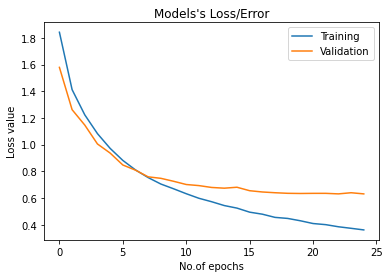

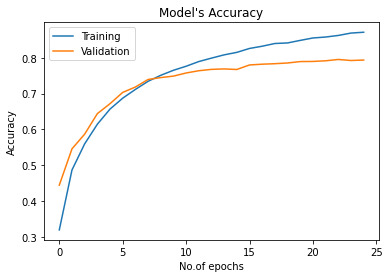

In [14]:
# Models Loss/Error value during training phase
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Models's Loss/Error")
plt.legend(["Training", "Validation"])
plt.xlabel("No.of epochs")
plt.ylabel("Loss value")
plt.show()

# Models Accuracy during training phase
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.legend(['Training', 'Validation'])
plt.xlabel('No.of epochs')
plt.ylabel("Accuracy")
plt.show()

# From the plots we can see as the training accuracy increasing, the validation accuracy is also increasing without the huge gap 
# which indicates the model is not overfitting.
# In case of the useCase model, the model is overfitting after 6th epoch.